In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import math, random

In [2]:
data = pd.read_csv("pollution.csv", index_col=0)

In [3]:
data.head(5)

,o3mean,o3firstMax,o3firstMaxHour,o3aqi,comean,cofirstMax,cofirstMaxHour,coaqi,so2mean,so2firstMax,so2firstMaxHour,so2aqi,no2mean,no2firstMax,no2firstMaxHour,no2aqi
0,0.018235,0.031,11.0,29.0,0.387500,0.5,0.0,6.0,0.333333,2.0,7,3.0,18.708333,39.0,23,37.0
1,0.028353,0.035,7.0,32.0,0.429167,0.6,19.0,7.0,0.000000,0.0,0,0.0,18.583333,33.0,17,31.0
2,0.019353,0.034,10.0,31.0,0.458333,0.7,0.0,8.0,0.000000,0.0,0,0.0,24.083333,41.0,18,39.0
3,0.021235,0.036,11.0,33.0,0.508333,0.7,12.0,8.0,0.226087,0.8,21,0.0,25.428571,45.0,22,42.0
4,0.040882,0.052,10.0,48.0,0.316667,0.4,9.0,5.0,0.000000,0.0,0,0.0,8.666667,16.0,4,15.0


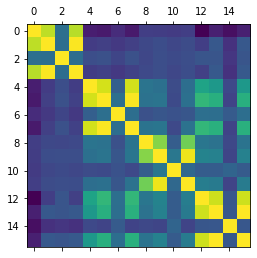

In [4]:
plt.matshow(data.corr())

In [5]:
from scipy import stats

In [ ]:
for col1 in data.columns:
    for col2 in data.columns:
        a,b = stats.pearsonr(data[col1],data[col2])
        if (abs(a) <0.4):
            print("corr: ", col1, " - ", col2, ": ", a)
        
    

In [6]:
data.columns

Index(['o3mean', 'o3firstMax', 'o3firstMaxHour', 'o3aqi', 'comean',
       'cofirstMax', 'cofirstMaxHour', 'coaqi', 'so2mean', 'so2firstMax',
       'so2firstMaxHour', 'so2aqi', 'no2mean', 'no2firstMax',
       'no2firstMaxHour', 'no2aqi'],
      dtype='object')

In [7]:
datos = pd.DataFrame({'o3mean':data.o3mean,'comean': data.comean,
                      'so2mean':data.so2mean, 'no2mean': data.no2mean})

In [8]:
datos

,o3mean,comean,so2mean,no2mean
0,0.018235,0.387500,0.333333,18.708333
1,0.028353,0.429167,0.000000,18.583333
2,0.019353,0.458333,0.000000,24.083333
3,0.021235,0.508333,0.226087,25.428571
4,0.040882,0.316667,0.000000,8.666667
...,...,...,...,...
306099,0.040588,0.100000,0.409091,1.281818
306100,0.037882,0.100000,0.325000,1.104167
306101,0.039765,0.100000,0.326087,1.678261
306102,0.049176,0.066667,0.317391,2.934783


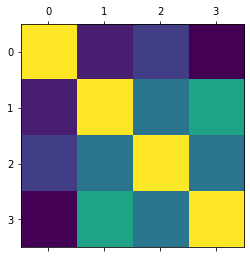

In [9]:
plt.matshow(datos.corr())

In [10]:
from mlxtend.preprocessing import minmax_scaling

In [11]:
from scipy import stats

In [17]:
scaled_data = minmax_scaling(datos, columns=['so2mean'])

(array([   156.,    352.,   3792., 114947.,  81203.,  42102.,  33745.,
         13969.,  10115.,   5723.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

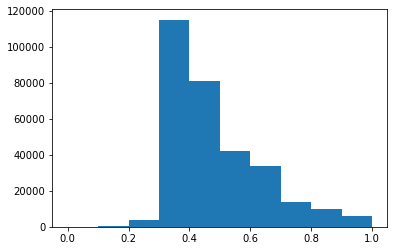

In [18]:
plt.hist(scaled_data)

In [21]:
dataso2mean = stats.boxcox(scaled_data['so2mean'])

ValueError: Data must be positive.

(array([ 2347., 10739., 28935., 48814., 62230., 63373., 51348., 28105.,
         9186.,  1027.]),
 array([0.001412 , 0.0070477, 0.0126834, 0.0183191, 0.0239548, 0.0295905,
        0.0352262, 0.0408619, 0.0464976, 0.0521333, 0.057769 ]),
 <BarContainer object of 10 artists>)

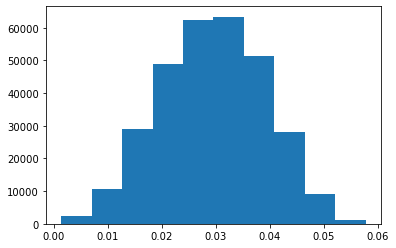

In [12]:
plt.hist(datos.o3mean)

(array([  441., 17094., 32999., 48328., 91305., 49023., 31558., 17075.,
        12022.,  6259.]),
 array([-0.111111 , -0.0379999,  0.0351112,  0.1082223,  0.1813334,
         0.2544445,  0.3275556,  0.4006667,  0.4737778,  0.5468889,
         0.62     ]),
 <BarContainer object of 10 artists>)

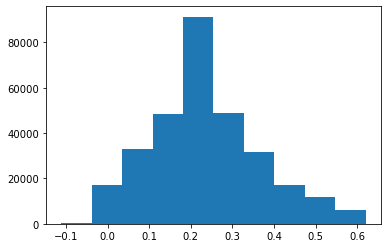

In [13]:
plt.hist(datos.comean)

(array([   156.,    352.,   3792., 114947.,  81203.,  42102.,  33745.,
         13969.,  10115.,   5723.]),
 array([-1.254167 , -0.8864776, -0.5187882, -0.1510988,  0.2165906,
         0.58428  ,  0.9519694,  1.3196588,  1.6873482,  2.0550376,
         2.422727 ]),
 <BarContainer object of 10 artists>)

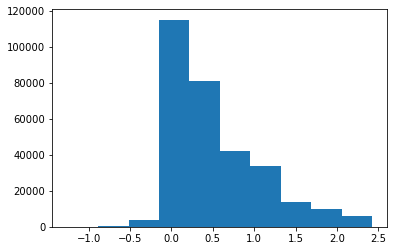

In [14]:
plt.hist(datos.so2mean)

(array([   81., 29815., 77189., 69676., 48627., 32637., 21416., 13394.,
         8375.,  4894.]),
 array([-4.529167 , -1.4720836,  1.5849998,  4.6420832,  7.6991666,
        10.75625  , 13.8133334, 16.8704168, 19.9275002, 22.9845836,
        26.041667 ]),
 <BarContainer object of 10 artists>)

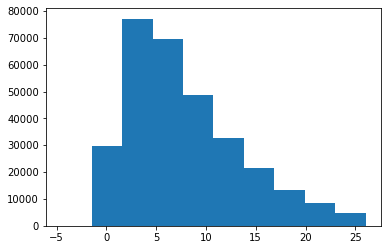

In [15]:
plt.hist(datos.no2mean)

In [ ]:
plt.boxplot(datos.o3mean)

In [ ]:
plt.boxplot(datos.comean)

In [ ]:
plt.boxplot(datos.no2mean)

In [ ]:
plt.boxplot(datos.so2mean)

In [ ]:
plt.scatter(datos.o3mean, datos.so2mean)